## Foundations of Data Science | 4022 | Dr. Bahrak & Dr. Yaghoobzadeh
## CA5
***
### Amirreza Akbari | 810899045
### Reza Baghestani | 810899046
### Hananeh Jamali | 810899053
***
### 1402/02/28

## Install & Import Libraries

In [23]:
import importlib.util

required_libraries = ["numpy", "pandas", "matplotlib", "scikit-learn"]

for lib in required_libraries:
    if importlib.util.find_spec(lib) is None:
        # Install the library
        !pip install {lib}

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Part 1: Preprocessing

In [24]:
# Load data from CSV file
df = pd.read_csv('football.csv')

# Display the first few rows of the DataFrame
print('=' * 120)
print(df.head())
print('=' * 120)
print(df.info())

# Check for missing values
print('=' * 120)
print(df.isnull().sum())

# Count the number of records where both 'outcome' and 'interferenceOnShooter' columns are missing
both_missed_count = df[(df['outcome'].isnull()) & (df['interferenceOnShooter'].isnull())].shape[0]
print('=' * 120)
print("Number of records where both 'outcome' and 'interferenceOnShooter' are missed:", both_missed_count)

# Filter the DataFrame to keep only rows where at least one of the columns is not missing
df_filtered = df.dropna(subset=['outcome', 'interferenceOnShooter'], how='all')

# Convert seconds to minutes by dividing by 60 and rounding up
df['converted_seconds'] = np.ceil(df['second'] / 60)

# Add the converted seconds to the minutes column
df['minute'] = df['minute'] + df['converted_seconds']
# Assuming df is your DataFrame containing the "x" and "y" columns

# Calculate the distance from the origin (0,0)
df['distance'] = np.sqrt(df['x']**2 + df['y']**2)

# Calculate the angle with respect to the positive x-axis (in radians)
df['angle'] = np.arctan2(df['y'], df['x'])

# Convert the angle to degrees if needed
df['angle_degrees'] = np.degrees(df['angle'])

# Drop the original "x" and "y" columns
df.drop(['x', 'y'], axis=1, inplace=True)

# Define the mapping of categories to ordinal values
mapping = {"low": 1, "medium": 2, "high": 3}

# Use the map function to apply the ordinal encoding
df['interferenceOnShooter_encoded'] = df['interferenceOnShooter'].map(mapping)

# Drop the original "interferenceOnShooter" column
df.drop(['interferenceOnShooter'], axis=1, inplace=True)
# Perform one-hot encoding for the "bodyPart" and "playType" columns
df = pd.get_dummies(df, columns=['bodyPart', 'playType'])

# Save the modified DataFrame to a new CSV file
df.to_csv('football_modified.csv', index=True)


  matchId playerId   playType    bodyPart      x      y  interveningOpponents  \
0    m_91    p_103  open play  right foot  13.47 -11.22                     1   
1    m_17     p_16  open play   left foot   9.48  14.22                     3   
2   m_111     p_88  free kick   left foot  29.43  -1.25                     6   
3   m_142     p_87  open play  right foot  26.93   1.00                     4   
4   m_117      p_9  open play  right foot  10.72   5.24                     2   

   interveningTeammates interferenceOnShooter  minute  second          outcome  
0                     0                medium      70       9             goal  
1                     0                medium      55       4  saved by keeper  
2                     2                   low      86      31  saved by keeper  
3                     1                medium      77       2    missed chance  
4                     0                medium      76      46             goal  
<class 'pandas.core.frame.D

## Part 2: Multivariate Regression Implementation

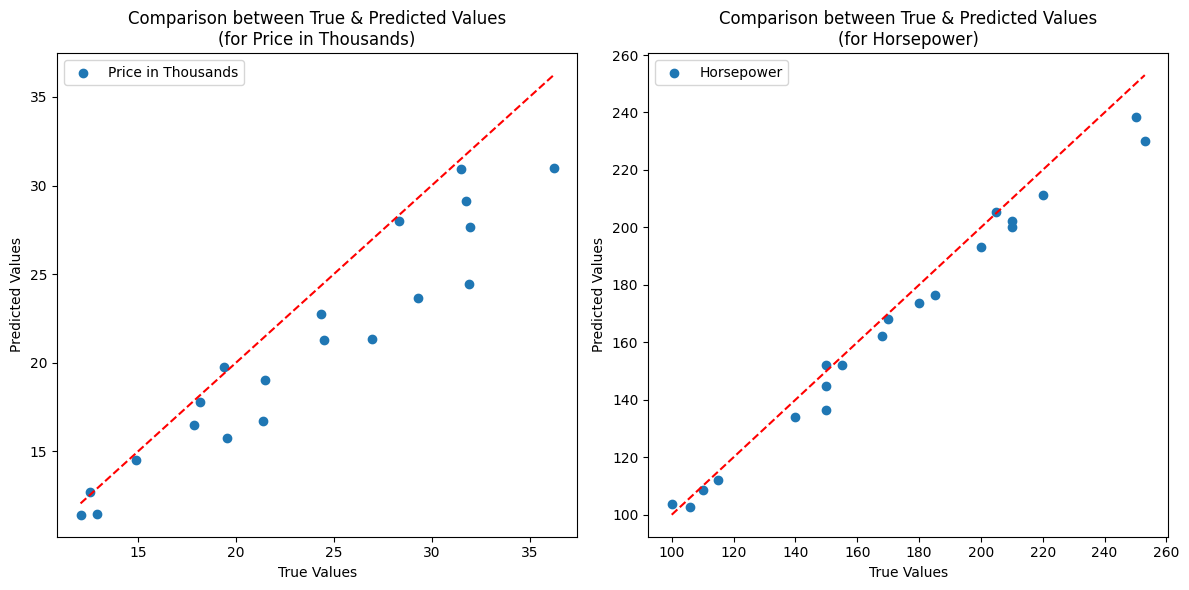

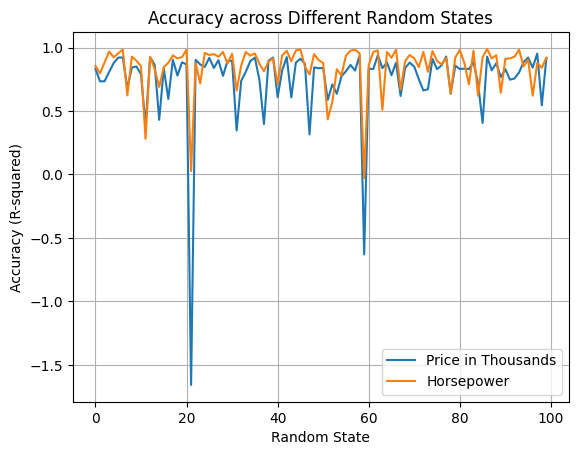

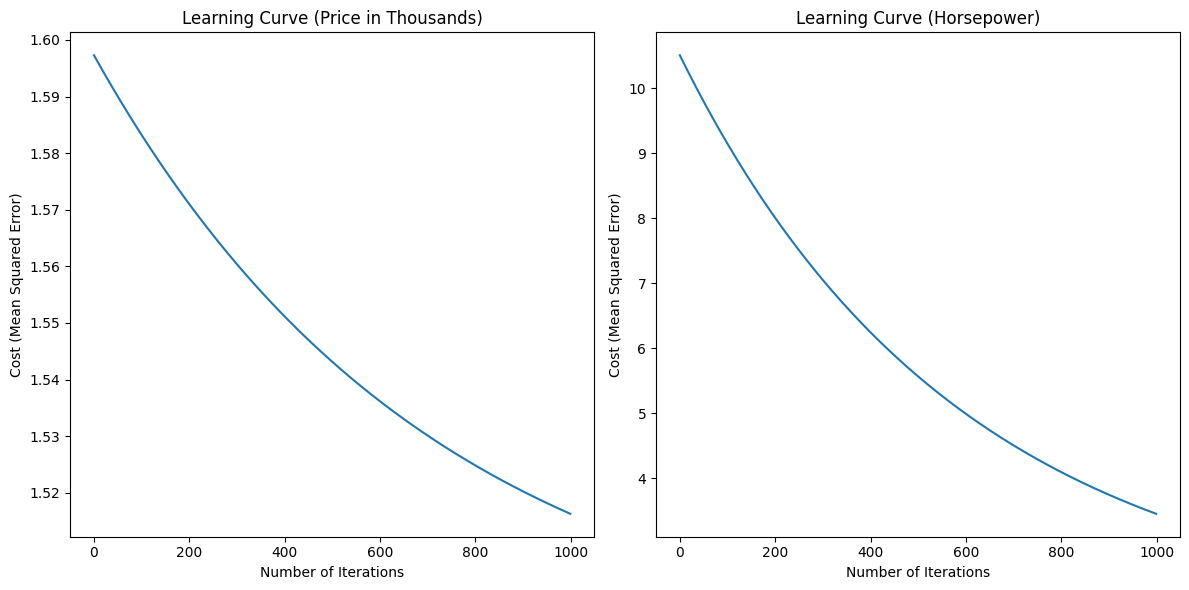

In [25]:
# Function to perform gradient descent and compute cost
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    for i in range(num_iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = (1 / m) * np.dot(X.T, errors)
        theta -= learning_rate * gradient
        
        # Compute cost
        squared_errors = np.square(errors)
        cost = (1 / (2 * m)) * np.sum(squared_errors)
        cost_history.append(cost)
    return theta, cost_history

# Multivariate Regression Implementation
class MultivariateRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.weights, cost_history = gradient_descent(X, y, self.weights, self.learning_rate, self.n_iters)

    def predict(self, X):
        y_pred = np.dot(X, self.weights)
        return y_pred

# Load the dataset
cars_data = pd.read_csv('cars.csv')

# Preprocess the data
X = cars_data.drop(['Price in Thousands', 'Horsepower'], axis=1).values
y_price = cars_data['Price in Thousands'].values.reshape(-1, 1)
y_horsepower = cars_data['Horsepower'].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X, y_price, test_size=0.2, random_state=28)
X_train_horsepower, X_test_horsepower, y_train_horsepower, y_test_horsepower = train_test_split(X, y_horsepower, test_size=0.2, random_state=28)

# Normalize features
X_train_price_normalized = (X_train_price - X_train_price.mean(axis=0)) / X_train_price.std(axis=0)
X_test_price_normalized = (X_test_price - X_test_price.mean(axis=0)) / X_test_price.std(axis=0)
X_train_horsepower_normalized = (X_train_horsepower - X_train_horsepower.mean(axis=0)) / X_train_horsepower.std(axis=0)
X_test_horsepower_normalized = (X_test_horsepower - X_test_horsepower.mean(axis=0)) / X_test_horsepower.std(axis=0)

# Add bias term (intercept)
X_train_price_normalized_with_bias = np.c_[np.ones((X_train_price_normalized.shape[0], 1)), X_train_price_normalized]
X_test_price_normalized_with_bias = np.c_[np.ones((X_test_price_normalized.shape[0], 1)), X_test_price_normalized]
X_train_horsepower_normalized_with_bias = np.c_[np.ones((X_train_horsepower_normalized.shape[0], 1)), X_train_horsepower_normalized]
X_test_horsepower_normalized_with_bias = np.c_[np.ones((X_test_horsepower_normalized.shape[0], 1)), X_test_horsepower_normalized]

# Train the model for Price in Thousands
model_price = MultivariateRegression()
model_price.fit(X_train_price_normalized_with_bias, y_train_price)
y_pred_price = model_price.predict(X_test_price_normalized_with_bias)

# Train the model for Horsepower
model_horsepower = MultivariateRegression()
model_horsepower.fit(X_train_horsepower_normalized_with_bias, y_train_horsepower)
y_pred_horsepower = model_horsepower.predict(X_test_horsepower_normalized_with_bias)

def plot_predictions(y_true_list, y_pred_list, labels):
    fig, axes = plt.subplots(1, len(y_true_list), figsize=(12, 6))

    for i, (y_true, y_pred, label) in enumerate(zip(y_true_list, y_pred_list, labels)):
        axes[i].scatter(y_true, y_pred, label=label)
        axes[i].set_title(f'Comparison between True & Predicted Values\n(for {label})')
        axes[i].set_xlabel('True Values')
        axes[i].set_ylabel('Predicted Values')
        axes[i].plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
        axes[i].legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot predictions for both Price in Thousands and Horsepower
plot_predictions([y_test_price, y_test_horsepower],
                          [y_pred_price, y_pred_horsepower],
                          ['Price in Thousands', 'Horsepower'])

# Plot accuracy across different random states
accuracies_price = []
accuracies_horsepower = []
random_states = range(100)

for random_state in random_states:
    X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X, y_price, test_size=0.2, random_state=random_state)
    X_train_horsepower, X_test_horsepower, y_train_horsepower, y_test_horsepower = train_test_split(X, y_horsepower, test_size=0.2, random_state=random_state)
    
    X_train_price_normalized = (X_train_price - X_train_price.mean(axis=0)) / X_train_price.std(axis=0)
    X_test_price_normalized = (X_test_price - X_test_price.mean(axis=0)) / X_test_price.std(axis=0)
    X_train_horsepower_normalized = (X_train_horsepower - X_train_horsepower.mean(axis=0)) / X_train_horsepower.std(axis=0)
    X_test_horsepower_normalized = (X_test_horsepower - X_test_horsepower.mean(axis=0)) / X_test_horsepower.std(axis=0)
    
    X_train_price_normalized_with_bias = np.c_[np.ones((X_train_price_normalized.shape[0], 1)), X_train_price_normalized]
    X_test_price_normalized_with_bias = np.c_[np.ones((X_test_price_normalized.shape[0], 1)), X_test_price_normalized]
    X_train_horsepower_normalized_with_bias = np.c_[np.ones((X_train_horsepower_normalized.shape[0], 1)), X_train_horsepower_normalized]
    X_test_horsepower_normalized_with_bias = np.c_[np.ones((X_test_horsepower_normalized.shape[0], 1)), X_test_horsepower_normalized]

    model_price.fit(X_train_price_normalized_with_bias, y_train_price)
    y_pred_price = model_price.predict(X_test_price_normalized_with_bias)
    accuracies_price.append(1 - np.mean((y_test_price - y_pred_price) ** 2) / np.var(y_test_price))

    model_horsepower.fit(X_train_horsepower_normalized_with_bias, y_train_horsepower)
    y_pred_horsepower = model_horsepower.predict(X_test_horsepower_normalized_with_bias)
    accuracies_horsepower.append(1 - np.mean((y_test_horsepower - y_pred_horsepower) ** 2) / np.var(y_test_horsepower))

plt.plot(random_states, accuracies_price, label='Price in Thousands')
plt.plot(random_states, accuracies_horsepower, label='Horsepower')
plt.xlabel('Random State')
plt.ylabel('Accuracy (R-squared)')
plt.title('Accuracy across Different Random States')
plt.legend()
plt.grid()
plt.show()

# Plot learning curve
def plot_learning_curves(models, X_list, y_list, labels):
    fig, axes = plt.subplots(1, len(models), figsize=(12, 6))
    
    for i, model in enumerate(models):
        _, cost_history = gradient_descent(X_list[i], y_list[i], model.weights, model.learning_rate, model.n_iters)
        axes[i].plot(range(len(cost_history)), cost_history)
        axes[i].set_xlabel("Number of Iterations")
        axes[i].set_ylabel("Cost (Mean Squared Error)")
        axes[i].set_title(f"Learning Curve ({labels[i]})")

    plt.tight_layout()
    plt.show()

# Call the function to plot learning curves for both models
plot_learning_curves([model_price, model_horsepower],
                     [X_train_price_normalized_with_bias, X_train_horsepower_normalized_with_bias],
                     [y_train_price, y_train_horsepower],
                     ['Price in Thousands', 'Horsepower'])
